# Figure generation notebook for Deep Learning lecture

Use this notebook to reproduce the figures. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

fig_path = 'figures'

## Activation functions

Visualization of those

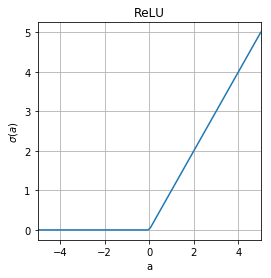

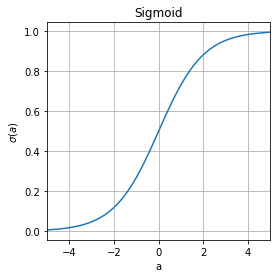

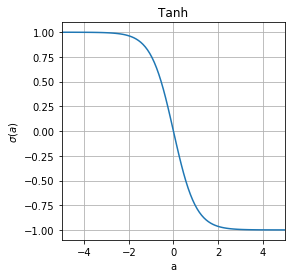

In [2]:
def visualize_fnc(fnc, name):
    x = np.linspace(-5,5,100)
    y = np.array([fnc(v) for v in x])
    
    plt.figure(figsize=(4,4))
    plt.title(name)
    plt.xlim([-5,5])
    #plt.ylim([-3,3])
    plt.plot(x, y)
    plt.xlabel('a')
    plt.ylabel('$\sigma(a)$')
    
    plt.grid()
    plt.savefig(os.path.join(fig_path, name+".jpg"), dpi=300)
    plt.show()
    
visualize_fnc(lambda x: np.maximum(0, x), 'ReLU')
visualize_fnc(lambda x: 1 / (1 + np.exp(-x)), 'Sigmoid')
visualize_fnc(lambda x: np.tanh(-x), 'Tanh')

/home/iaroslav/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


170500096/170498071 [==============================] - 84s 0us/step


/home/iaroslav/.local/lib/python3.5/site-packages/ipykernel_launcher.py:25: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


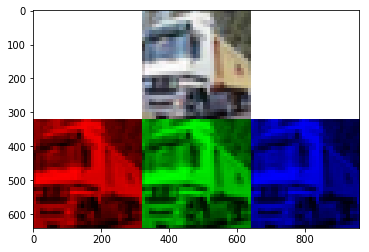

In [2]:
# example image and spectrogram
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import imresize

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

img = x_train[1]

a = np.column_stack([
    img*[1,0,0],
    img*[0,1,0],
    img*[0,0,1]
])

b = np.column_stack([
    img*0+255,
    img,
    img*0+255
])

img = np.row_stack([b, a])

img = imresize(img, 10.0, 'nearest')

#img = img.astype('uint8')

plt.imshow(img)
plt.imsave('figures/image_array.jpg', img)
plt.show()

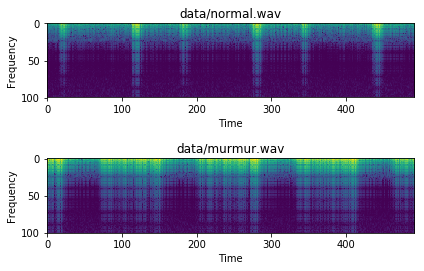

In [3]:
# Example spectrogram, calculated from an audio file.
from scipy.io.wavfile import read
from scipy.signal import spectrogram

for i, d in enumerate(['data/normal.wav', 'data/murmur.wav']):
    wav = read(d)[1]
    wav = wav[:int(44100*2.5)]

    spec = spectrogram(wav, nfft=512)
    fr = spec[0]
    spec = spec[2]
    spec = np.log(spec + 1.0)
    spec = spec[:100]

    plt.subplot(2, 1, i+1)
    plt.title(d)
    plt.imshow(spec)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.savefig('figures/spectrogram.png', dpi=300)
plt.show()

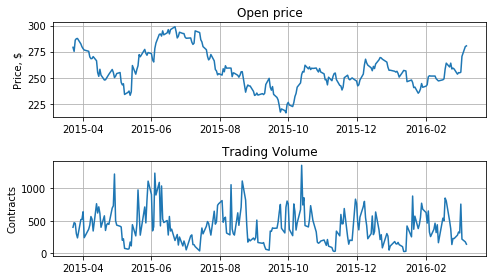

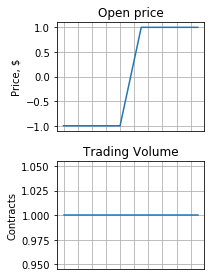

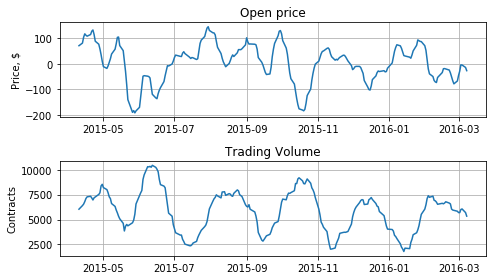

In [97]:
# example visualization of market historical data
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/lumber_prices.csv')
df = df[int(len(df)*0.7):]
stamps = df['Date'].astype('datetime64[ns]')

def plot_signal(df, fname=None, figsize=(7, 4), skip_axis=False):
    plt.figure(figsize=figsize)
    for i, d in enumerate([('Open', 'Open price', 'Price, $'), ('Volume', 'Trading Volume', 'Contracts')]):
        c, t, u = d
        plt.subplot(2, 1, i+1)
        plt.ylabel(u)
        plt.title(t)
        y = df[c]
        x = stamps[:len(y)]
        plt.plot(x, y)
        plt.grid()
        if skip_axis:
            plt.tick_params(
                axis='x',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                bottom=False,      # ticks along the bottom edge are off
                top=False,         # ticks along the top edge are off
                labelbottom=False) # labels along the bottom edge are off
    plt.subplots_adjust(hspace=0.4)
    plt.tight_layout()
    if fname is not None:
        plt.savefig(fname, dpi=300, bbox_inches='tight')
    plt.show()

signals = {
    'Open': np.array(df['Open']),
    'Volume': np.array(df['Volume']),
}
    
plot_signal(signals, 'figures/futures_raw')
    
from scipy.signal import convolve

convolutions = {
    'Open': np.concatenate([-np.ones(7), np.ones(7)]),
    'Volume': np.linspace(1.0, 1.0, 14),
}

plot_signal(convolutions, figsize=(3, 4), skip_axis=True, fname='figures/futures_filters')

cnn = {k: convolve(s, convolutions[k], mode='valid') for k, s in signals.items()}

plot_signal(cnn, fname='figures/futures_result')

11493376/11490434 [==============================] - 24s 2us/step


/home/iaroslav/.local/lib/python3.5/site-packages/ipykernel_launcher.py:37: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


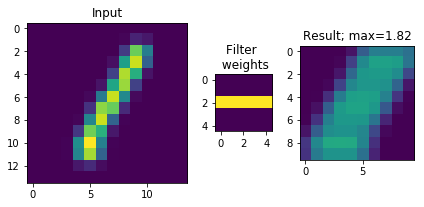

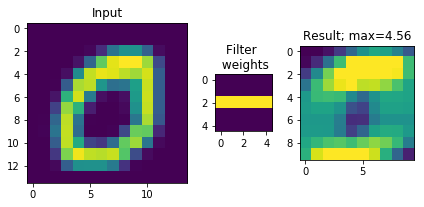

In [98]:
# visualization of a convolutional layer
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import imresize

from scipy.signal import convolve2d

(X, y), _ = mnist.load_data()

ones = X[y == 1, :, :]
zeros = X[y == 0, :, :]


def show_activations_unstructured(x, c, fname=None):
    x = imresize(x, (14, 14))
    x = x / 255.0
    
    def save(e):
        if fname is not None:
            plt.savefig(fname+"_"+e+".jpg", dpi=80)
        plt.show()
    
    #plt.title('Input')
    plt.imshow(x)
    save('x')
    #plt.title('Neuron weights')
    plt.imshow(c)
    save('c')
    #plt.title('Result')
    r = convolve2d(x, c)
    plt.imshow(r, vmin=0, vmax=3)
    save('y')

def show_activations(x, c, fname=None):
    x = imresize(x, (14, 14))
    x = x / 255.0
    r = convolve2d(x, c, mode='valid')
    
    scales = [1.0 * len(v) / len(x) for v in [x, c, r]]
    
    f, (a0, a1, a2) = plt.subplots(1,3, gridspec_kw = {'width_ratios':scales})
    
    a0.set_title('Input')
    a0.imshow(x)

    a1.set_title('Filter \n weights')
    a1.imshow(c)
    a1.set_xticks(list(range(len(c)))[::2])
    a1.set_yticks(list(range(len(c)))[::2])
    
    a2.set_title('Result; max=%s' % np.round(r.max(),2))
    a2.imshow(r, vmin=0, vmax=3)
    if fname is not None:
        plt.savefig(fname, dpi=200,bbox_inches='tight')
    
    f.tight_layout() 
    plt.tight_layout()
    plt.show()

disp = show_activations

c = np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
])
    
disp(ones[7], c, 'figures/cnn_one')
disp(zeros[4], c, 'figures/cnn_zero')